In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#import both files
cityDF = pd.read_csv("city_data.csv")

# sum driver count by city to account for duplicate Port James entry
cityDFmergetype = cityDF
city_df = cityDFmergetype


In [3]:
rideDF = pd.read_csv("raw_data/ride_data.csv")


In [4]:
#combine both files on city
combineDF = pd.merge(rideDF, cityDFmergetype, on = "city", how = "inner")
combineDF.columns = ("City", "Date", "Fare", "Ride ID", "Driver Count", "Type")


In [5]:
#calculate average fare per city
meanDF = pd.DataFrame(combineDF.groupby("City")["Fare"].mean())
meanDF.columns = ["Average Fare"]
meanDF
averagefarecity = meanDF["Average Fare"]


In [6]:
#calculate total fare per city
sumDF = pd.DataFrame(combineDF.groupby("City")["Fare"].sum())
sumDF.columns = ["Total Fare"]
sumDF
totalfarecity = sumDF["Total Fare"]


In [7]:
#calculate total number of rides per city
totalRidesDF = pd.DataFrame(combineDF.groupby("City")["Ride ID"].count())
totalRidesDF.columns = ["Total Rides"]
totalRidesDF
totalriderscity = totalRidesDF["Total Rides"]

In [8]:
#calculate total number of drivers per city
totalDriversDF = pd.DataFrame(cityDF[["city","driver_count"]])
DriversDF = totalDriversDF.set_index("city")

totaldriverscity = DriversDF["driver_count"]

In [9]:
#show city type
citytypeshow = pd.DataFrame(cityDF[["city","type"]])
citytypeDf = citytypeshow.set_index("city")
citytypeDf

citytype = citytypeDf["type"]

In [10]:
# % of total fare by city type
fareCityDF = pd.DataFrame(combineDF.groupby("Type")["Fare"].sum())
fareCityDF.columns = ["Total Fare"]
fareDF = fareCityDF.reset_index()

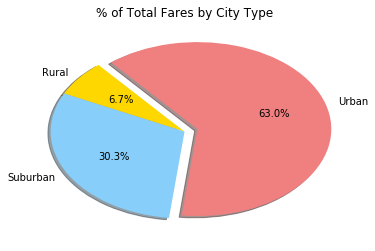

In [11]:
# % of Total Fares by City Type
labels = fareDF["Type"]
sizes = fareDF["Total Fare"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.title("% of Total Fares by City Type")
plt.pie(x = sizes, explode=explode, labels= labels, colors=colors, autopct="%1.1f%%"
        ,shadow=True, startangle=130)
plt.savefig("percentfares.png")
plt.show()

In [12]:
# % of total rides by city type
ridesCityDF = pd.DataFrame(combineDF.groupby("Type")["Ride ID"].count())
ridesCityDF.columns = ["Total Rides"]
ridesDF = ridesCityDF.reset_index()

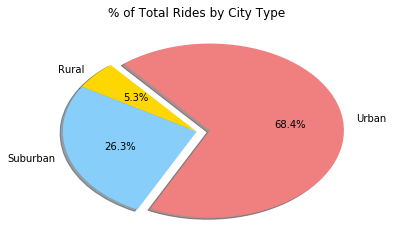

In [13]:
# % of Total Rides by City Type
labels = ridesDF["Type"]
sizes = ridesDF["Total Rides"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.title("% of Total Rides by City Type")
plt.pie(x = sizes, explode=explode, labels= labels, colors=colors, autopct="%1.1f%%"
        ,shadow=True, startangle=130)
plt.savefig("percentrides.png")
plt.show()

In [14]:
# % of total drivers by city type
driversCityDF = pd.DataFrame(cityDF.groupby("type")["driver_count"].sum())
driversCityDF.columns = ["Total Drivers"]
driversDF = driversCityDF.reset_index()

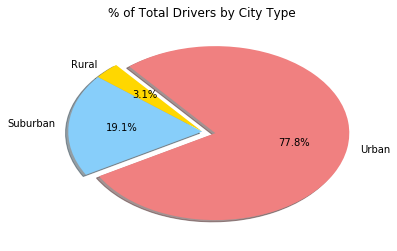

In [15]:
# % of Total Fares by City Type
labels = driversDF["type"]
sizes = driversDF["Total Drivers"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.title("% of Total Drivers by City Type")
plt.pie(x = sizes, explode=explode, labels= labels, colors=colors, autopct="%1.1f%%"
        ,shadow=True, startangle=130)
plt.savefig("percentdrivers.png")
plt.show()

### Your objective is to build a Bubble Plot that showcases the relationship between four key variables:
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In [16]:
# combine files with mean, rides, and total fare
city_df.set_index("city", inplace = True)
city_df["average_fare"] = averagefarecity
city_df["ride_count"] = totalriderscity

In [17]:
# separate by type
urban_df = city_df.loc[city_df["type"]=="Urban",:]
suburban_df = city_df.loc[city_df["type"]=="Suburban",:]
rural_df = city_df.loc[city_df["type"]=="Rural",:]

In [18]:
# Urban scatterplot
# x = ride count
x = urban_df["ride_count"]

# y = average fare
y = urban_df["average_fare"]

# z = total drivers
z = urban_df["driver_count"]

colors = ["gold"]

urban_plot = plt.scatter(x= x, y=y, s=z*5, c=colors, alpha=0.5, edgecolor = "black", label = "Urban")


In [19]:
# Suburban scatterplot
#x = ride count
x = suburban_df["ride_count"]

#y = average fare
y = suburban_df["average_fare"]

#z = total drivers
z = suburban_df["driver_count"]

colors = ["lightskyblue"]

suburbanplot = plt.scatter(x= x, y=y, s=z*5, c=colors, alpha=0.5, edgecolor = "black", label = "Suburban")



In [20]:
# Rural scatterplot
# x = ride count
x = rural_df["ride_count"]

# y = average fare
y = rural_df["average_fare"]

# z = total drivers
z = rural_df["driver_count"]

colors = ["lightcoral"]

ruralplot = plt.scatter(x= x, y=y, s=z*5, c=colors, alpha=0.5, edgecolor = "black", label = "Rural")


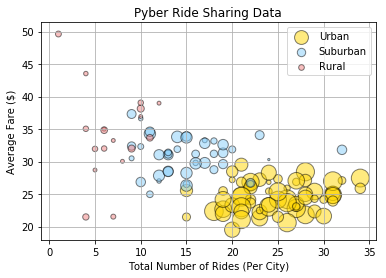

In [21]:
# Set title
plt.title('Pyber Ride Sharing Data')

# Set x-axis label
plt.xlabel('Total Number of Rides (Per City)')

# Set y-axis label
plt.ylabel('Average Fare ($)')

plt.legend(loc="best")
plt.grid()
plt.savefig("pyberbubble.png")
plt.show()

## Observations
* There are substantially more drivers and riders in the Urban areas.
* Although Rural areas have less drivers and riders their Average Fares are mostly higher.
* Urban area drivers make less on an average fare than Suburban and Rural areas, however the number of rides they have per city make up for the difference in average fare and they end up with a higher total fare.


